In [1]:
import os
import subprocess
from PIL import Image

dir0 ='org'
dir1 = 'png'
dir2 = 'png_resize'

files0 = os.listdir(dir0)
files0.sort()

for file in files0:

    if '.HEIC'  in file:        
        command = 'sips --setProperty format png ' + dir0 +'/' + file +  ' --out ' + dir1 +'/' +  file.replace('.HEIC','.png') 
        subprocess.call(command, shell=True)
        print(file) 
        
files1 = os.listdir(dir1)
files1.sort()
print('')

for file in files1:
    
    if '.png' in file:   
        img0 = os.path.join(dir1, file)
        img0_img = Image.open(img0)
        img1_img = img0_img.resize((300,300)) 
        img1 = os.path.join(dir2, file) 
        img1_img.save(img1)
        print(file)
    

IMG_0193.HEIC

IMG_0193.png


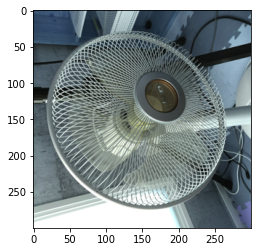

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

image_data2 = []
dir2 = 'png_resize'
files2 = os.listdir(dir2)
files2.sort()

grid =28

for file in files2:
    if '.png'  in file:        
        img = cv2.imread('./png_resize/' + file)    
        plt.imshow(img)
        h, w, c = img.shape    

        v_split = grid 
        h_split = grid 
        _img = img[:h // v_split * v_split, :w // h_split * h_split]

        image_data =[]

        for h_img in np.vsplit(_img, v_split): 
            for v_img in np.hsplit(h_img, h_split): 
                b, g, r = cv2.split(v_img)  
                value = round(g.mean())/100
                image_data.append(value)
        
        image_data_array = np.array(image_data)
        image_data_array2=image_data_array.reshape(grid, grid)
               

IMG_0193.png


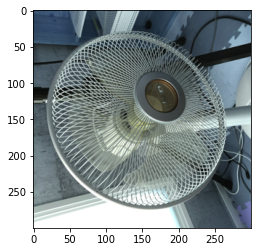

In [3]:
print(file)   
plt.imshow(img)

IMG_0193.png


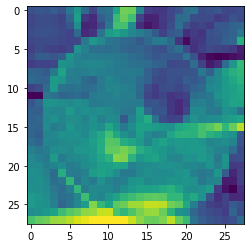

In [4]:
print(file)   
plt.imshow(image_data_array2)